### Partition_based_clustering

#### 1) k_Means_clustering

In [7]:
import pandas as pd
data = pd.read_csv("Wthr.csv")
data.head()

,DATE,ICE RAIN,TMAX,TMIN,RAIN
0,01-01-1948,0.47,51,42,True
1,02-01-1948,0.59,45,36,True
2,03-01-1948,0.42,45,35,True
3,04-01-1948,0.31,45,34,True
4,05-01-1948,0.17,45,32,True


In [8]:
df = data.iloc[:,[1,3]]
df.head()

,ICE RAIN,TMIN
0,0.47,42
1,0.59,36
2,0.42,35
3,0.31,34
4,0.17,32


In [9]:
import numpy as np
x = np.array(df) # the data manipulation is easy on array 

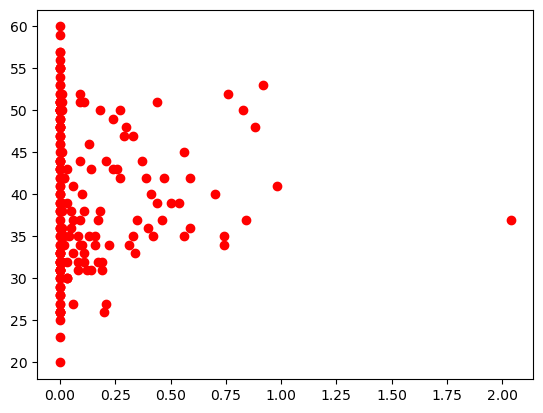

In [10]:
import matplotlib.pyplot as plt
plt.plot(x[:,0],x[:,1],'or')

In [11]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # DOING THIS TO AVOID PYTHON WARNING

In [12]:
# importing kmeans clustering
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(x)
print(model.labels_)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\HIMANSHU SURYAVANSHI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HIMANSHU SURYAVANSHI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


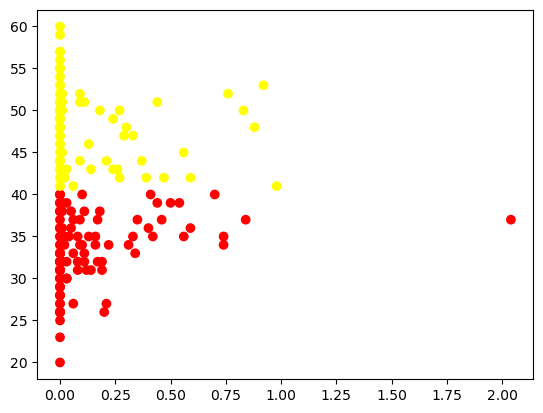

In [13]:
plt.scatter(x[:,0],x[:,1],c=model.labels_,cmap='autumn')

#### 2 K-medoide_clustering

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("Wthr.csv")
data.head()

,DATE,ICE RAIN,TMAX,TMIN,RAIN
0,01-01-1948,0.47,51,42,True
1,02-01-1948,0.59,45,36,True
2,03-01-1948,0.42,45,35,True
3,04-01-1948,0.31,45,34,True
4,05-01-1948,0.17,45,32,True


In [18]:
df = data.iloc[:,[2,3]]
x = np.array(df)

In [19]:
# Compute initial medoids (for example, taking the median of each feature)
initial_medoids = np.median(x, axis=0).astype(int)
initial_medoids

array([54, 39])

In [20]:
# Create instance of K-Medoids algorithm.
from pyclustering.cluster.kmedoids import kmedoids
kmedoids_instance = kmedoids(x, initial_medoids,3)

In [21]:
# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
# Show allocated clusters.
print(clusters)

[[86, 87, 104, 105, 106, 110, 131, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 139, 148]]


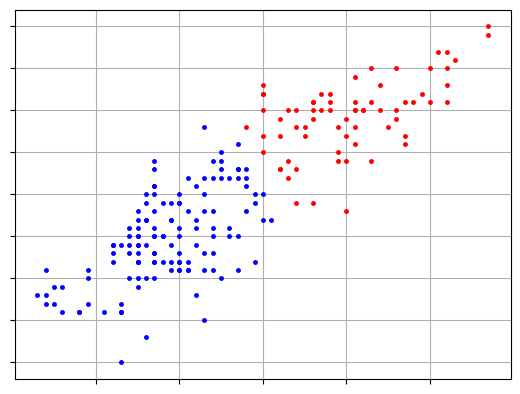

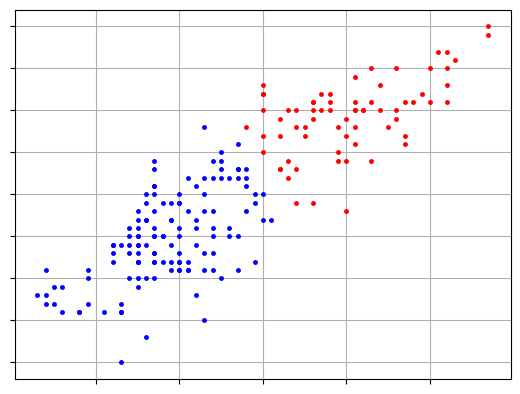

In [27]:
from pyclustering.cluster import cluster_visualizer
# Display clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, x)
visualizer.show()

## Hirarchical Based Clustering

### 1) Aglomirative Clustering

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r"E:\DebugShala\Machine learning\New folder\Wthr.csv")
data.head()

,DATE,ICE RAIN,TMAX,TMIN,RAIN
0,01-01-1948,0.47,51,42,True
1,02-01-1948,0.59,45,36,True
2,03-01-1948,0.42,45,35,True
3,04-01-1948,0.31,45,34,True
4,05-01-1948,0.17,45,32,True


In [9]:
df = data.iloc[:,[2,3]]
df.head()

,TMAX,TMIN
0,51,42
1,45,36
2,45,35
3,45,34
4,45,32


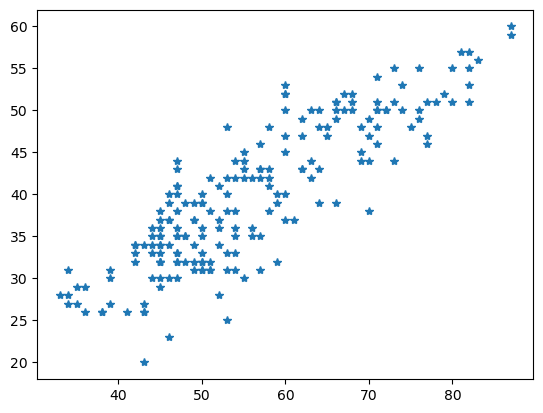

In [10]:
x = np.array(df) # converting to array
plt.plot(x[:,0],x[:,1],"*")

In [11]:
from sklearn.cluster import AgglomerativeClustering
am = AgglomerativeClustering(n_clusters=2).fit(x)
print(model.labels_)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [12]:
# df['target']=am

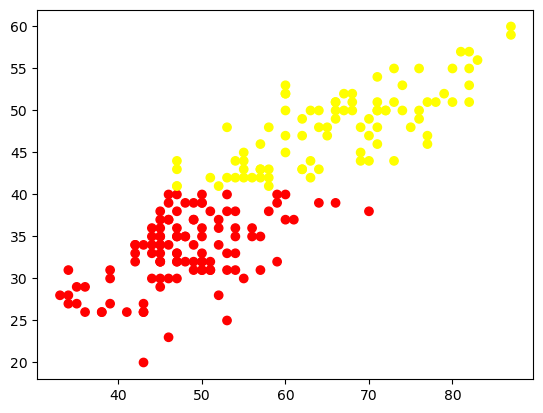

In [13]:
plt.scatter(x[:,0],x[:,1],c=model.labels_,cmap='autumn')